<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

**Problem Statement**: Predict Canada's per capita income in year 2030 using canada_gdp.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datasets/gdp/canada_gdp.csv')

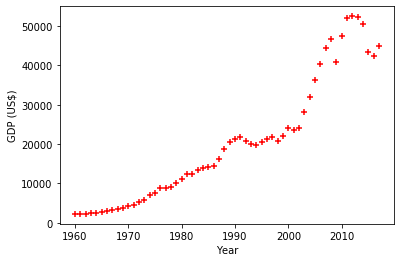

In [3]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('GDP (US$)')
plt.scatter(df.year,df.gdp,color='red',marker='+')

In [4]:
year = df[['year']]

In [5]:
gdp = df.gdp

In [6]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(year,gdp)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
reg.predict([[2022]])

array([50164.63699512])

In [8]:
reg.coef_

array([888.64448804])

In [9]:
reg.intercept_

-1746674.5178212621

In [10]:
year_df = pd.read_csv("../datasets/year.csv")

In [11]:
p = reg.predict(year_df)

In [12]:
year_df['income']=p
year_df

,year,income
0,2018,46610.059043
1,2019,47498.703531
2,2020,48387.348019
3,2021,49275.992507
4,2022,50164.636995
5,2023,51053.281483
6,2024,51941.925971
7,2025,52830.570459
8,2027,54607.859435
9,2028,55496.503923


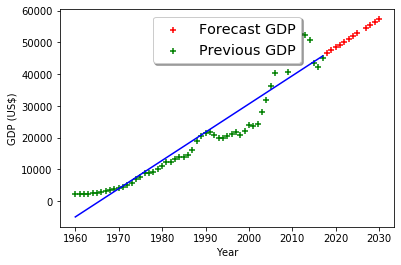

In [13]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('GDP (US$)')
plt.scatter(year_df.year,p,color='red',marker='+',label='Forecast GDP')
plt.scatter(year,gdp,color='g',marker='+',label='Previous GDP')
plt.plot(year,reg.predict(year),color='blue')
legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')

In [14]:
print('Training score: {}'.format(reg.score(year, gdp)))

Training score: 0.9023998321820319


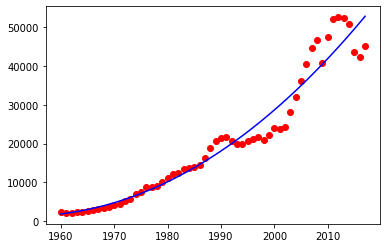

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
poly_x=poly.fit_transform(year)
from sklearn.linear_model import LinearRegression
regre=LinearRegression()
regre.fit(poly_x,gdp)
import matplotlib.pyplot as plt
plt.scatter(year,gdp,color='red')
plt.plot(year,regre.predict(poly.fit_transform(year)),color='blue')
plt.show()


In [16]:
print('Training score: {}'.format(regre.score(poly_x, gdp)))

Training score: 0.9458582026367561


In [17]:
# Now Read Years
year_f = pd.read_csv("../datasets/year.csv")

In [18]:
qr = regre.predict(poly.fit_transform(year_f))

In [19]:
year_f['gdp']=qr
print('Forecast per capita GDP (US$) : ')
year_f

Forecast per capita GDP (US$) : 


,year,gdp
0,2018,54409.272399
1,2019,56102.456045
2,2020,57823.597572
3,2021,59572.759271
4,2022,61350.003431
5,2023,63155.392343
6,2024,64988.988298
7,2025,66850.853586
8,2027,70659.641323
9,2028,72606.688353


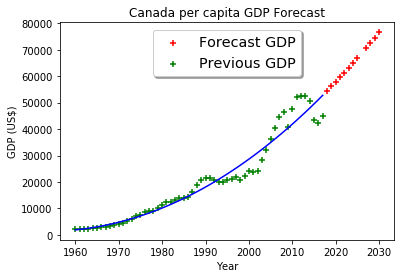

In [20]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('GDP (US$)')
plt.title('Canada per capita GDP Forecast')
plt.scatter(year_f.year,qr,color='red',marker='+', label='Forecast GDP')
plt.scatter(df.year,df.gdp,color='g',marker='+',label='Previous GDP')
plt.plot(year,regre.predict(poly.fit_transform(year)),color='blue')
legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')